# Chapter 3 - Graphics and Visualisation

In [1]:
import numpy as np
from numpy import array
import matplotlib.pyplot as plt
from matplotlib.pyplot import plot, show


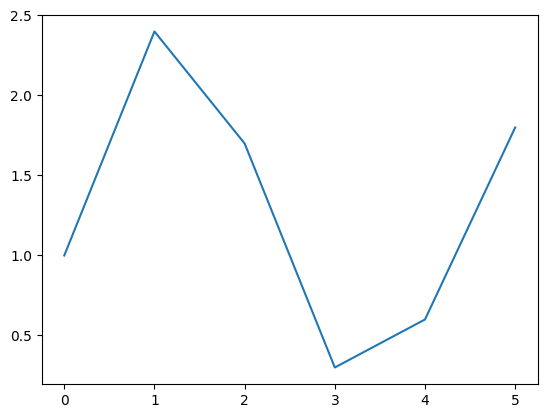

In [2]:
y = array([1.0, 2.4, 1.7, 0.3, 0.6, 1.8])
plt.plot(y) #with x = (0,1,...) unit intervals
plt.show()

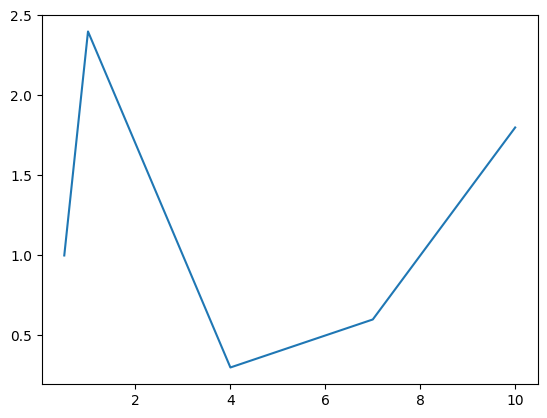

In [3]:
x = array([ 0.5, 1.0, 2.0, 4.0, 7.0, 10.0])
y = [1.0, 2.4, 1.7, 0.3, 0.6, 1.8]
plot(x, y)
show()


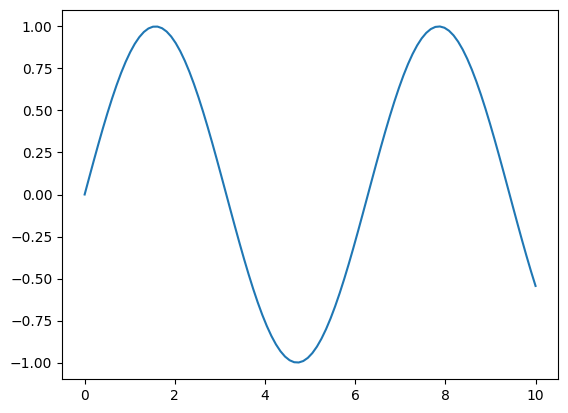

In [4]:
x = np.linspace(0, 10, 100)
y = np.sin(x)
plot(x, y)
show()

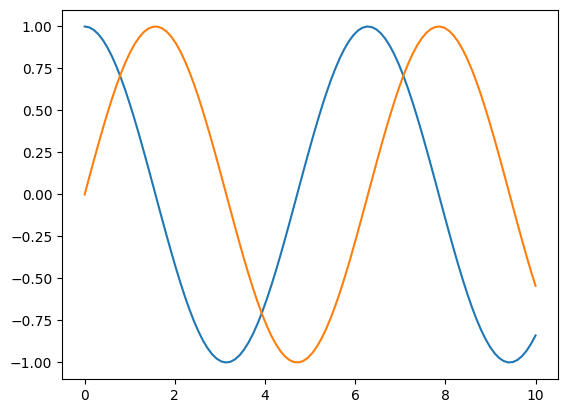

In [5]:
x = np.linspace(0, 10, 100)
y1 = np.cos(x)
y2 = np.sin(x)
y3 = np.tan(x)
plot(x, y1)
plot(x, y2)
#plot(x, y3)
show() # a blocking function - it blocks the progress of the program until the function is done with its job

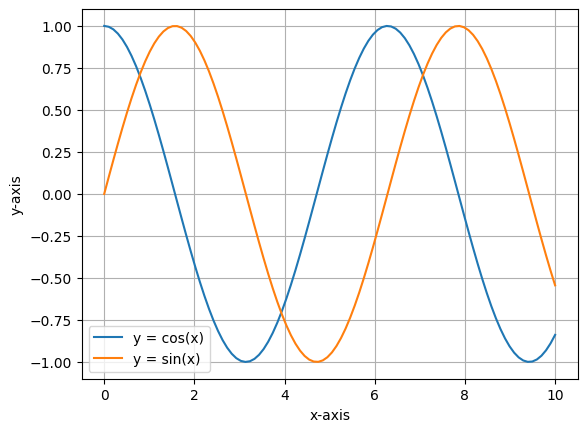

In [6]:
x = np.linspace(0, 10, 100)
y1 = np.cos(x)
y2 = np.sin(x)
y3 = np.tan(x)
plot(x, y1, label = 'y = cos(x)')
plot(x, y2, label = 'y = sin(x)')
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.legend()
plt.grid(True)
show()

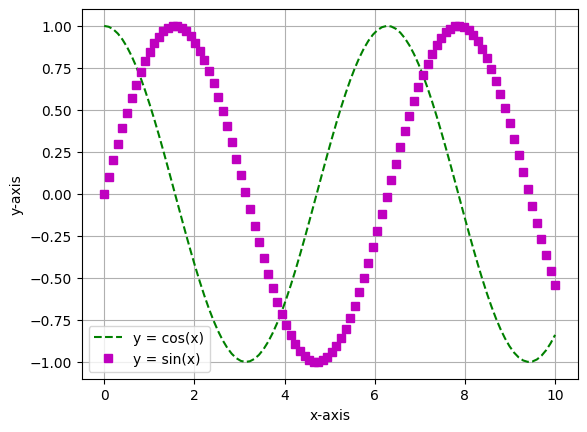

In [7]:
x = np.linspace(0, 10, 100)
y1 = np.cos(x)
y2 = np.sin(x)
y3 = np.tan(x)
plot(x, y1, label = 'y = cos(x)', ls = '--', color = 'green')
plt.plot(x, y2, 'ms',label = 'y = sin(x)')
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.legend()
plt.grid(True)
show()


## Exercise 3.1 Plotting experimental data


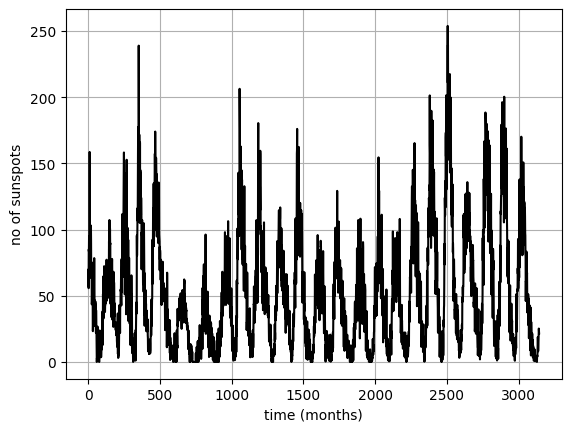

In [8]:
#a)
sunspot_data  = np.loadtxt('sunspots.txt', float)
t = sunspot_data[:,0]
sunspots = sunspot_data[:,1]
plot(t, sunspots, 'k-')
plt.grid(True)
plt.xlabel('time (months)')
plt.ylabel('no of sunspots')
show()

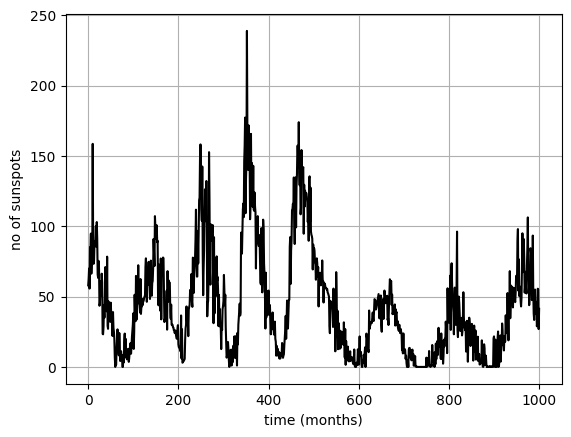

In [9]:
#b)
plot(t[:1001], sunspots[:1001], 'k-') #first 1000 data points
plt.grid(True)
plt.xlabel('time (months)')
plt.ylabel('no of sunspots')
show()

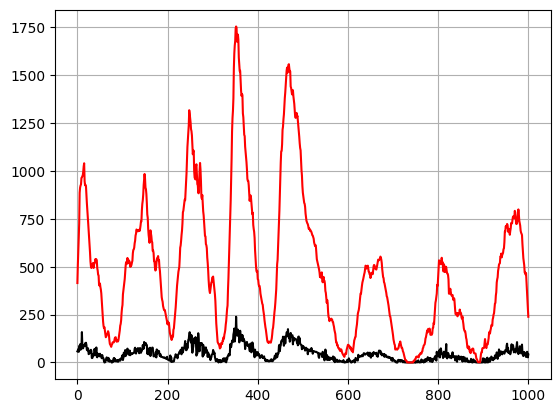

In [10]:
#c) 
def running_average(data, r):
    n = len(data)
    Y_k = np.zeros(n)
    coeff = 1/(2*r + 1)
    for k in range(n):
        lower = int(max(0, k - r))
        upper = int(min(n, k + r + 1))
        sum = 0
        for m in range(lower, upper):
            sum += data[m]
        Y_k[k] = sum
    return Y_k

##Plotting

r = 5
plot(t[:1001], sunspots[:1001], 'k-', label = 'Sunspots count per month')
plot(t[:1001], running_average(sunspots[:1001], r), 'r-', label = 'Running average for sunspots count')
plt.grid(True)
show()
            

## Exercise 3.2: Curve Plotting

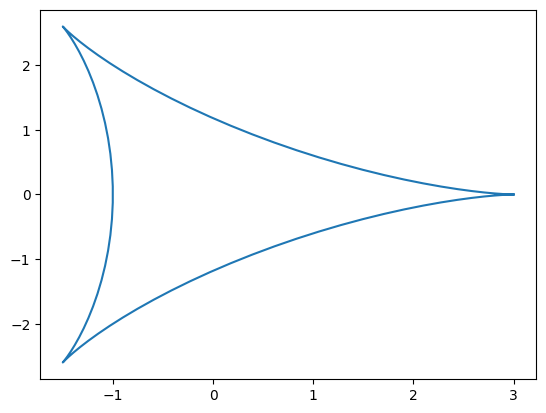

In [11]:
# a) Deltoid Curve

theta = np.linspace(0, 2*np.pi, 100)
x = 2*np.cos(theta) + np.cos(2* theta)
y = 2* np.sin(theta) - np.sin(2*theta)
plot(x, y, label = 'Deltoid Curve')
show()

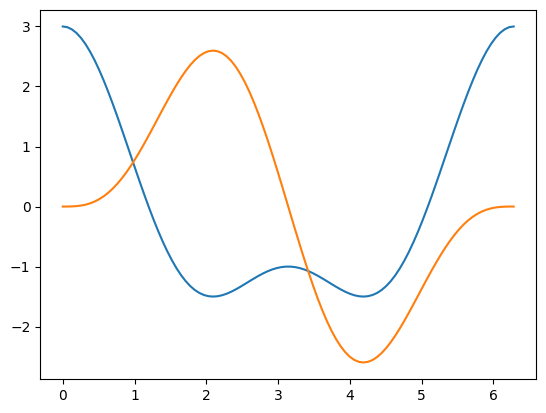

In [12]:
plot(theta, x)
plot(theta, y)

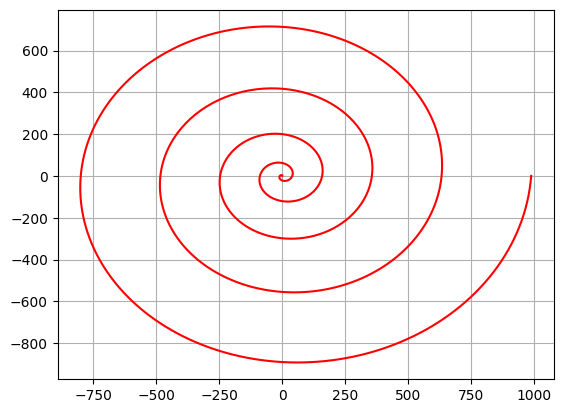

In [13]:
#b)
theta = np.linspace(0, 10*np.pi, 1000)
r = theta**2
x = r*np.cos(theta)
y = r*np.sin(theta)
plt.plot(x, y, 'r-')
plt.grid(True)
show()

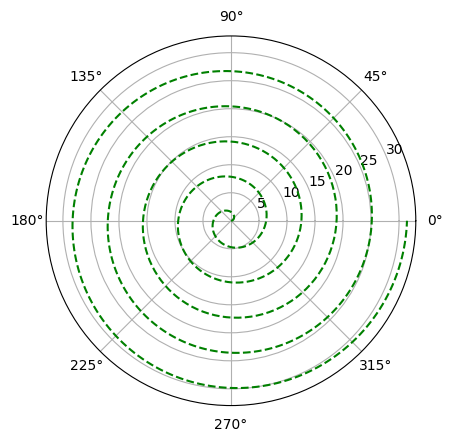

In [15]:
plt.polar(theta, np.sqrt(r), 'g--')

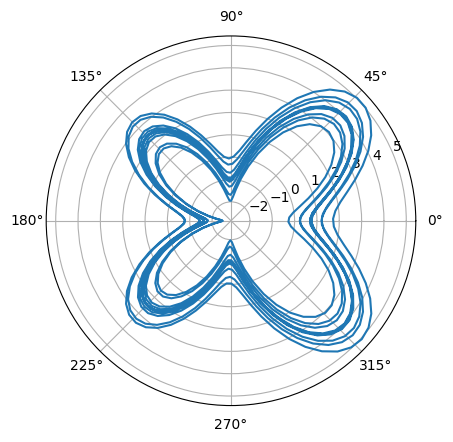

In [16]:
#c) Fey's function
theta = np.linspace(0, 24*np.pi, 1000)
r = np.exp(np.cos(theta)) - 2* np.cos(4*theta) + np.sin(theta/12)**5
plt.polar(theta, r)
plt.grid(True)
plt.show()

### Temperaturs and Magnitude of a set of stars

The Herstzprung-Russel Diagram. A scatter plot of the magnitude (i.e., brightness) of stars against their approximate surface temperature (which is es- timated from the color of the light they emit). Each dot on the plot represents one star out of a catalog of 7860 stars that are close to our solar system.


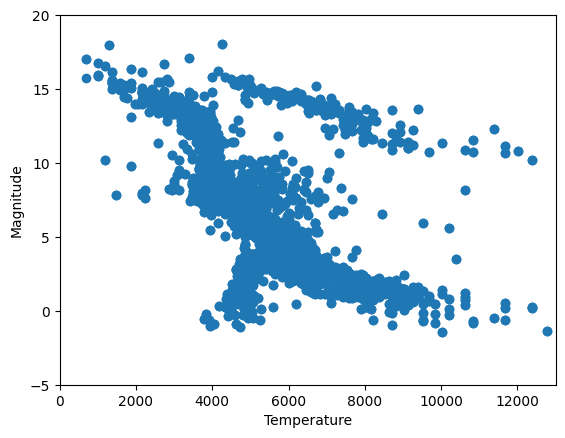

In [17]:
stars_data = np.loadtxt('stars.txt', float)
stars_temp = stars_data[:,0]
stars_magnitude = stars_data[:,1]
plt.scatter(stars_temp, stars_magnitude, label = 'Magnitude vs Temperatire')
plt.xlabel('Temperature')
plt.ylabel("Magnitude")
plt.xlim(0, 13000)
plt.ylim(-5, 20)
plt.show()

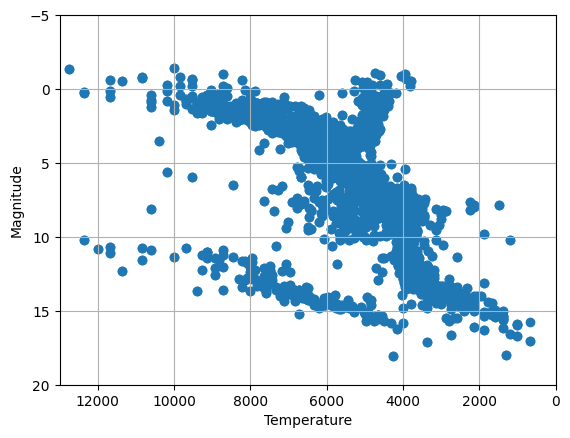

In [18]:
plt.scatter(stars_temp, stars_magnitude, label = 'Magnitude vs Temperatire')
plt.xlabel('Temperature')
plt.ylabel("Magnitude")
plt.xlim(13000, 0)
plt.ylim(20,-5) #Flipped for conventional reasons
plt.grid()
plt.show()

### Density plots

501
501


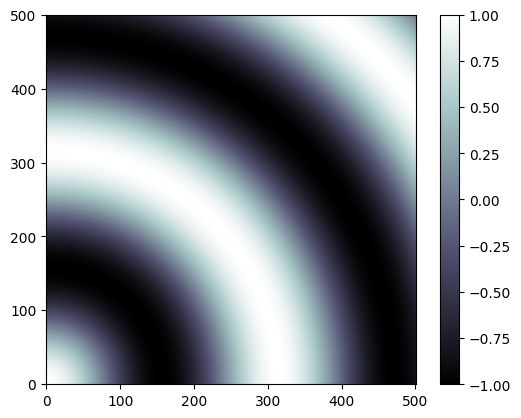

In [19]:
circular_data = np.loadtxt('circular.txt', float)
print(len(circular_data)) # how many sets of data are there
print(len(circular_data[0])) #what's the dimensionality of the items inside the greatest array 
plt.imshow(circular_data, origin = 'lower') #heatmaps blue- coldest and red being the hottest
plt.bone()
plt.colorbar()
show()

## Example 3.1 Wave Interference

In [20]:
def distance(r, center):
    x = r[0]
    y = r[1]
    x1 = center[0]
    y1 = center[1]
    distance = np.sqrt((x - x1)**2 + (y -y1)**2)
    return distance

def wave_height(r0, center, A0, l):
    k = 2*np.pi/l
    r = distance(r0, center)
    A = A0 * np.sin(k*r)* np.cos(k*r)
    return A


In [21]:
wavelength = 5.0
seperation = 20.0 # in cm
side  = 100 # side of the square in cm ~ make 1 m**2 box
points = 500 # no of grid points along each side
spacing  = side/points # spacing of points in cm
A0 = 1 # amplitude in cm

#calculate the position of the centers

x1 = side/2 - seperation/2
y1 = side/2
x2 = side/2 + seperation/2
y2 = side/2 
r_01 = x1, y1
r_02 = x2, y2 

#make a 500 x 500 matrix 
xi = np.zeros([points, points], float)
print(xi)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [22]:
## Calculate the values in the array
for i in range(points): ## 500 
    y = spacing* i #(0.2 * i), you walk through each of the y-axis
    for j in range(points): # and then compute for all the z-axis
        x = spacing * j
        r0 = x,y
        xi[i,j] = wave_height(r0, r_01, A0, wavelength) + wave_height(r0, r_02, A0, wavelength)

print(xi)

[[0.17448381 0.26022909 0.29791875 ... 0.2896841  0.29791875 0.26022909]
 [0.30997167 0.3606959  0.35797579 ... 0.31011627 0.35797579 0.3606959 ]
 [0.42130073 0.42413802 0.37355933 ... 0.28398332 0.37355933 0.42413802]
 ...
 [0.48783217 0.43485167 0.33483116 ... 0.20752596 0.33483116 0.43485167]
 [0.42130073 0.42413802 0.37355933 ... 0.28398332 0.37355933 0.42413802]
 [0.30997167 0.3606959  0.35797579 ... 0.31011627 0.35797579 0.3606959 ]]


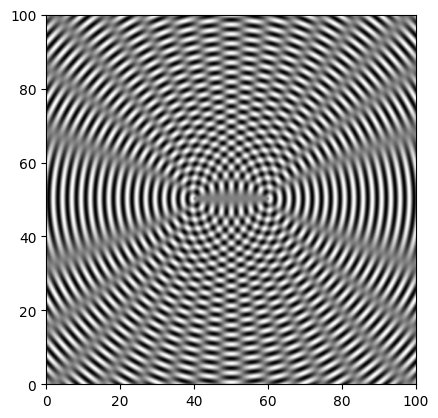

In [23]:
# make the plot
plt.imshow(xi, origin = 'lower', extent = [0, side, 0, side])
plt.gray()
plt.show()

## Plotting Scannin Tunneling Microscope (STM)

In [24]:
stm_data = np.loadtxt('stm.txt', float)

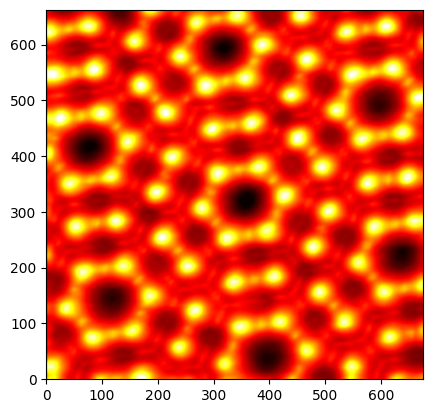

In [25]:
plt.imshow(stm_data, origin = 'lower')
# plt.xlim(200, 500)
# plt.ylim(200, 500)
plt.hot()

## 3-D Graphics ( Consult sphere_lattice.py)

## Deterministic chaos and Feigenbaum plot:
One of the mot famous examples of the phenomenon of chaos is the logistic map, defined by the equation
x' = rx(1-x) where r is a constant and the function is iteratively done. 
One of three things happens:
1. the value settles down to a fixed number and stays there. This is a fixed point. 
2. It doesn't settle down to a single value but it settles down into a periodic pattern, rotating around a set of values, such as say four values, repeating them in sequence over and over. This is called a limit cycle.
3. It goes crazy. It generates a seemingly random sequence of numbers that appears to have no ryme or reason to them at all. This is determinstic chaos. 

/var/folders/zl/fqyfw3z95bjccqn0m2sm7qhw0000gn/T/ipykernel_15596/2848232159.py:7: RuntimeWarning: overflow encountered in multiply
  x = r*x*(1-x)


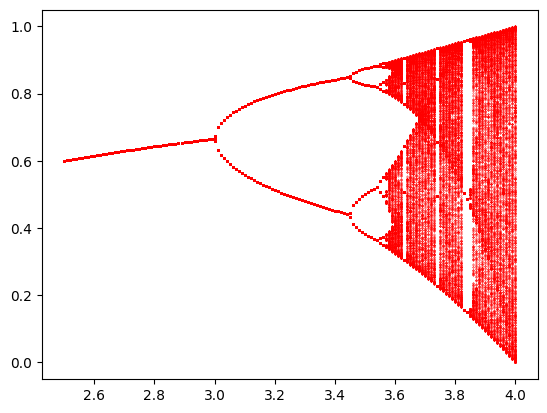

In [49]:
#initial values
r = np.arange(2.5, 10.01, 0.01)
x = np.ones(len(r)) * 0.5
count = 0
fig, ax = plt.subplots(1,1)
while count <= 1000:
    x = r*x*(1-x)
    count += 1
while count <= 2000:
    x = r*x*(1-x)
    ax.plot(r, x, 'ro', markersize = 0.25)
    count += 1


## Mandelbrot Set

A fractal, an infinitely ramified mathematical object that contains structure within structure, as deep as we care to look.
Def: z' = z^2 + c where z is a comple number and c is a complex constant
The mandelbrot set is the set of points in the complex plane that satisfies the following definition:
    "For a given complex value of c, start with z = 0 and iterate repeatedly. If the magnitude |z| of the resulting value is ever greater than 2, then the pont in the complex plane at positio c is not in the Mandelbrot set, otherwise it is in the set."
Theoretically we need to do infinite iterations to know whether the magnitude becomes greater 2 but for all practical purposes, iteration of ~100 does the job
      

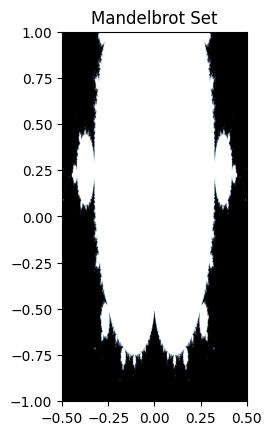

In [127]:
# complex numbers
def complex_norm(z):
    norm = abs(z)
    return norm

# #let's make a  (100 x 100) grid
# N = 100
# x = np.linspace(-2, 2, N)
# y = np.linspace(-2, 2, N)
# figs, axs = plt.subplots(1,1)
# grid = np.ones((N,N), float)
# for i in range(N):
#     for j in range(N):
#         c = complex(x[i], y[j])
#         z = 0 + 0j
#         for k in range(100):
#             z = z**2 + c
#             if abs(z) > 2:
#                 #not in mandelbrot set
#                 grid[i,j] = 0
#                 break
# print(grid)


# plt.imshow(grid, extent = (-2, 2, -2, 2))
# plt.gray()

def generate_mandelbrot_set(N, max_iter, xlimit = (-2,2), ylimit = (-2,2)):
    xlower= xlimit[0]
    xupper = xlimit[1]
    ylower= ylimit[0]
    yupper = ylimit[1]
    x = np.linspace(xlower, xupper, N)
    y = np.linspace(ylower, yupper, N)
    grid = np.ones((N,N), float)
    
    figs, axs = plt.subplots(1,1)

    for i in range(N):
        for j in range(N):
            c = complex(x[i], y[j])
            z = 0 + 0j
            for k in range(max_iter):
                z = z**2 + c
                if abs(z) > 2:
                    #not in mandelbrot set
                    grid[i,j] = 0
                    break
    axs.imshow(grid, extent = (xlower, xupper, ylower, yupper), cmap = 'bone')
    plt.title('Mandelbrot Set')
    return grid

generate_mandelbrot_set(1000, 100, (-0.5, 0.5), (-1, 1))

def update_mandelbrot(frame = 100, zoom_factor = 0.9, N = 1000, max_iter = 100):
    # Calculate the bounds for the current frame
    x_min, x_max = -2 * zoom_factor**frame, 2 * zoom_factor**frame
    y_min, y_max = -2 * zoom_factor**frame, 2 * zoom_factor**frame

    #Generate mandelbrot set
    axs.clear()
    grid = generate_mandelbrot_set(N, max_iter, xlimit = (x_min, x_max), ylimit= (y_min, y_max))
    axs.imshow(grid, extent = (x_min, x_max, y_min, y_max), cmap='jet')
    axs.set_title('Mandelbrot Set')
    #Clear your plotting for the next
    return axs

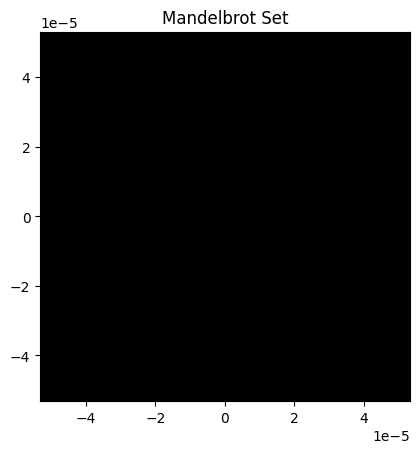

<Axes: >

In [125]:
update_mandelbrot()

In [126]:
import matplotlib.animation as animation

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/matplotlib/animation.py:892: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


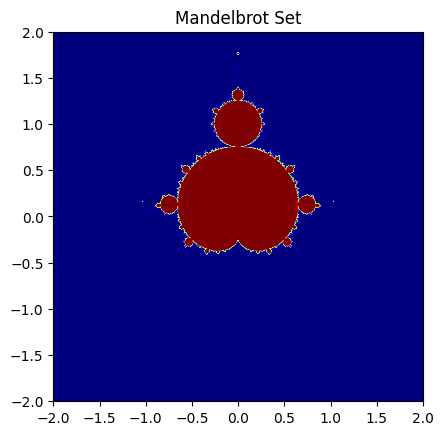

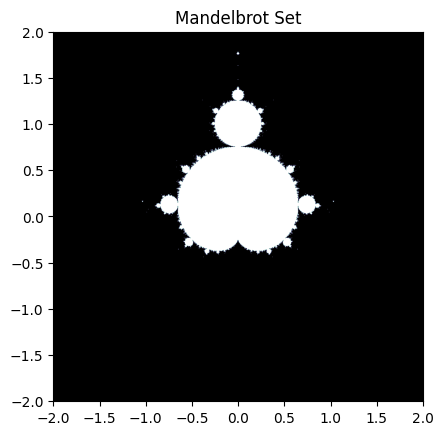

In [130]:
fig, axs = plt.subplots(1,1)
ani = animation.FuncAnimation(fig, update_mandelbrot, frames = 100, repeat = False)

In [113]:
C[:,0]

array([-2.-2.j        , -2.-1.95959596j, -2.-1.91919192j, -2.-1.87878788j,
       -2.-1.83838384j, -2.-1.7979798j , -2.-1.75757576j, -2.-1.71717172j,
       -2.-1.67676768j, -2.-1.63636364j, -2.-1.5959596j , -2.-1.55555556j,
       -2.-1.51515152j, -2.-1.47474747j, -2.-1.43434343j, -2.-1.39393939j,
       -2.-1.35353535j, -2.-1.31313131j, -2.-1.27272727j, -2.-1.23232323j,
       -2.-1.19191919j, -2.-1.15151515j, -2.-1.11111111j, -2.-1.07070707j,
       -2.-1.03030303j, -2.-0.98989899j, -2.-0.94949495j, -2.-0.90909091j,
       -2.-0.86868687j, -2.-0.82828283j, -2.-0.78787879j, -2.-0.74747475j,
       -2.-0.70707071j, -2.-0.66666667j, -2.-0.62626263j, -2.-0.58585859j,
       -2.-0.54545455j, -2.-0.50505051j, -2.-0.46464646j, -2.-0.42424242j,
       -2.-0.38383838j, -2.-0.34343434j, -2.-0.3030303j , -2.-0.26262626j,
       -2.-0.22222222j, -2.-0.18181818j, -2.-0.14141414j, -2.-0.1010101j ,
       -2.-0.06060606j, -2.-0.02020202j, -2.+0.02020202j, -2.+0.06060606j,
       -2.+0.1010101j , -